# Analyzing a dataset on the churn rate of telecom operator clients

## Importing Numpy, Pandas, Matplotlib, Seaborn Library

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# load the dataset and view first 5 rows
dataset = pd.read_csv('Datasets/telecom_churn_dataset.csv')
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Dimensionality of the dataset

In [9]:
# Dimensionality of DataFrame
dataset.shape

(3333, 20)

## Features the dataset

In [12]:
# Features in dataset
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Data types of all features

In [14]:
# .types - returns a Series with the data type of each column.
dataset.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

**Insights:**

- Feature 'churn' is logical bolean type.

- Three Features 'State', 'Internation plan', and 'Voice mail plan' are object type.

- Rest all 16 features are of numeric.

- There are no null or NaN because each column contains 3333 observations, the same number of rows we saw before with shape.

## Converting data type of churn feature from bool to int64

In [18]:
# .type - cast object to a specified dtype dtype
dataset['Churn'] = dataset['Churn'].astype('int64')
dataset['Churn'].dtype

dtype('int64')

## Displaying basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [19]:
# Stastical details of numeric values in dataset.
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Statsical details of non-numerical value by explicitley indicating data type in include parameter

In [24]:
# describe()
dataset.describe(include=['object','bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


## value_counts() for categorical (type object) and boolean (type bool) on churn feature

In [34]:
# value_counts() - returns a Series containing counts of each category
count = dataset['Churn'].value_counts()
count

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:>

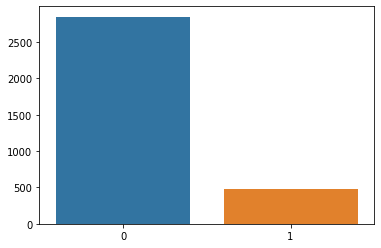

In [35]:
# barplot is basically used to aggregate the categorical data
sns.barplot(count.index,count.values)

**Insights:**

- 2850 of total customers have churn value 0 i.e they are loyal.

- 483 of total customers have churn value 1.

##  Sorting multiple columns in  dataset 

In [32]:
# Sorting by 'Churn' in ascending order and then on 'Total day charge' by descending order
dataset.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


In [36]:
## Finding propertion of churn users
df['Churn'].mean() * 100

14.491449144914492

**Insights:**

    - 14.5% seems bad for a company

## Time (on average) do churned users spend on the phone during daytime

In [41]:
# dataset[dataset['Churn'] == 1] would give churned customer rows
dataset[dataset['Churn']==1]['Total day minutes'].mean()

206.91407867494823

## Ploting a contigency table using crosstab() of 'churn'  vs. 'Voice mail plan' 

In [49]:
# Compute a simple cross tabulation of two (or more) factors
# add an attribute normalize=True to crosstab().  
pd.crosstab(dataset['Churn'],dataset['Voice mail plan'], normalize=True)

Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


## Ploting a contigency table using crosstab() of 'churn'  vs. 'International plan' 

In [47]:
# Compute a simple cross tabulation of two (or more) factors
pd.crosstab(dataset['Churn'],dataset['International plan'])

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


**Insights:**

- Most of the users are loyal and do not use additional services (International Plan/Voice mail).

# Average number of day, evening, and night calls by area code

In [51]:
# Create a spreadsheet-style pivot table as a DataFrame.
dataset.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


# Plot a contigency table using crosstab() of 'churn'  vs. 'International plan' 

In [52]:
# adding an attribute margins=True to crosstab()  -> this would Add row/column margins (subtotals)
pd.crosstab(df['Churn'], dataset['International plan'], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


#  Plot a vertical bar graph showing count of customers,using 'International Plan' under both the churn categories

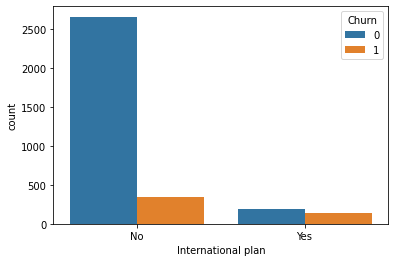

In [53]:
# hue parameter determines which column in the data frame should be used for colour encoding
sns.countplot(x='International plan', hue='Churn', data=dataset);

**Insights:**
- We see that, with International Plan, the churn rate is much higher, which is an interesting observation! 

- Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

# Plot a contigency table using crosstab() of 'churn'  vs. 'Customer service calls' 

In [66]:
pd.crosstab(dataset['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


# Plot a vertical bar graph showing count of customers, using 'Customer service calls' under both the churn categories.



<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

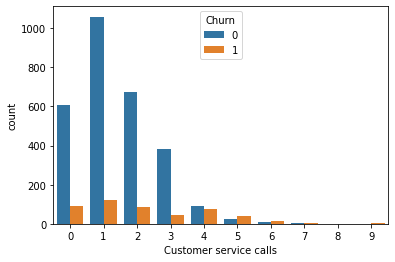

In [67]:
sns.countplot(x = 'Customer service calls', hue='Churn', data=dataset)

**Insights:**
- Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

# Adding a binary feature to our DataFrame – Customer service calls > 3. 

In [68]:
dataset['Many_service_calls'] = (dataset['Customer service calls'] > 3).astype('int')

pd.crosstab(dataset['Many_service_calls'], dataset['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


# Plot 'Many_service_calls'  vs. 'Churn'

<AxesSubplot:xlabel='Many_service_calls', ylabel='count'>

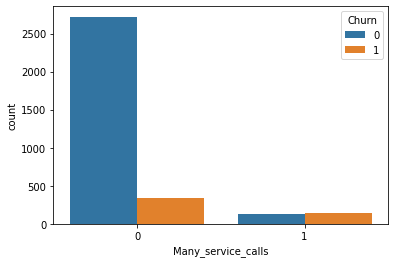

In [59]:
sns.countplot(x='Many_service_calls', hue='Churn', data=dataset)

**Conclusion:**
- Predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). 

- This number, 85.8%, that we got through this very simple reasoning, serves as a good starting point (baseline) for the further machine learning models that we will build.